## ENSEMBLE LEARNING

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

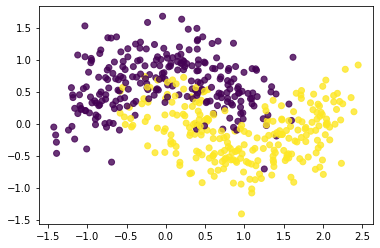

In [4]:
# génération d'un dataset
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)
plt.show()

In [6]:
# création Train set et Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)

## VOTING CLASSIFIER

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [14]:
# les modèles qui vont être utiliséssur notre foule
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

# quel serait la performance de chaque modèle sur notre dataset?
for model in (model_1, model_2, model_3):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test)*100, '%')

SGDClassifier 84.0 %
DecisionTreeClassifier 86.0 %
KNeighborsClassifier 86.0 %


In [15]:
# ajout Voting classifier ajoute la liste des modèles utilisés
# passer la technique de vote utilisée hard (prédiction majoritaite)
# ou soft : accumuler les probabilités de chaque classe
model_4 = VotingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                          voting='hard')

# quel serait la performance de chaque modèle sur notre dataset?
for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test)*100, '%')
# 87% en utilisant l'ensemble des modèles

SGDClassifier 84.0 %
DecisionTreeClassifier 86.0 %
KNeighborsClassifier 86.0 %
VotingClassifier 87.33333333333333 %


In [17]:
#  mais pas très utilisé car pas possible d'avoir une diversité 
# ==> bagging ou bosting

## BAGGING

In [18]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

### BaggingClassifier

In [22]:
# base_estimator : utiliser un estimateur de base qu'on veut  ex KNN
# n_estimators : préciser le nombre d'estimateur dans la foule par déf 100
model = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                         n_estimators=100)
# entrainer le modèle
model.fit(X_train, y_train)
# tester le modèle
model.score(X_test, y_test)
# 89% donc meilleur qu'une simle technique de vote grace à la diversité

0.8866666666666667

### RandomForestClassifier

In [24]:
# préciser seulement le nombre d'estimateur 
# car par défaut base_estimateur = arbre de décision
model = RandomForestClassifier(n_estimators=100)

# entrainer le modèle
model.fit(X_train, y_train)
# tester le modèle
model.score(X_test, y_test)
# 87 %

0.8733333333333333

In [26]:
# meilleur résultat que BaggingClassifier mais il faut l'améliorer
# jouer sur max_depth profondeur des arbres
model = RandomForestClassifier(n_estimators=1000, max_depth=10)

# entrainer le modèle
model.fit(X_train, y_train)
# tester le modèle
model.score(X_test, y_test)
# 89% mais plus on augmente la profondeur, plus il faut de foule et plus
# le modèle est lent

0.8933333333333333

## BOOSTING

In [27]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

## AdaBoostClassifier

In [30]:
# préciser le nombre d'estimateurs
model = AdaBoostClassifier(n_estimators=100)

# entrainer le modèle
model.fit(X_train, y_train)
# tester le modèle
model.score(X_test, y_test)
# 88%

0.88

In [31]:
# ajouter hyperparamètre, changer estimateur de base, learning_rate...
# utiliser une GridSearchCv pour trouver les meilleurs hyperparametres

## STACKING

In [32]:
from sklearn.ensemble import StackingClassifier

In [33]:
# entrainer un estimateur par dessus les prédictions des diff modèles

In [36]:
# les modèles qui vont être utiliséssur notre foule
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

model_4 = StackingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                          final_estimator=KNeighborsClassifier())

# entrainer le modèle
model_4.fit(X_train, y_train)
# tester le modèle
model_4.score(X_test, y_test)   
#  87%

0.8666666666666667

In [35]:
# Bagging : pour de l'over fitting
# Boosting : pour underfiting
# Stacking : très forte si on a entrainer x fois le modèle (la plus lente)